# Pré-Processamento

## Importando bibliotecas

In [1]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from hydra import initialize, compose
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/lonalt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lonalt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lonalt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
with initialize(version_base=None, config_path="../config/"):
    cfg = compose(config_name='main')
    
df = pd.read_csv(f"../{cfg.data.interim}")

## Pré-processamento do texto

In [3]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
#Padronizar
def replace_patterns(sentence):
    patterns = [
        (r'\bper share\b', 'per-share'),
        (r'\bpct\b|\bper-cent\b', 'percent'),
        (r'\bmn\b|\bmln\b', 'million')
    ]
    # Aplica cada padrão de substituição
    for pattern, replacement in patterns:
        sentence = re.sub(pattern, replacement, sentence)

    return sentence

df['text'] = df['Sentence'].apply(replace_patterns)

df.head()

,Sentence,Sentiment,text
0,The GeoSolutions technology will leverage Bene...,positive,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$ESI on lows, down $1.50 to $2.50 BK a real po..."
2,"For the last quarter of 2010 , Componenta 's n...",positive,"For the last quarter of 2010 , Componenta 's n..."
3,According to the Finnish-Russian Chamber of Co...,neutral,According to the Finnish-Russian Chamber of Co...
4,The Swedish buyout firm has sold its remaining...,neutral,The Swedish buyout firm has sold its remaining...


In [5]:
#Remover Hiperlink
def remover_hiperlinks(texto):
    return re.sub(r'http\S+', '', texto)

df['text'] = df['text'].apply(remover_hiperlinks)

df.head()

,Sentence,Sentiment,text
0,The GeoSolutions technology will leverage Bene...,positive,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$ESI on lows, down $1.50 to $2.50 BK a real po..."
2,"For the last quarter of 2010 , Componenta 's n...",positive,"For the last quarter of 2010 , Componenta 's n..."
3,According to the Finnish-Russian Chamber of Co...,neutral,According to the Finnish-Russian Chamber of Co...
4,The Swedish buyout firm has sold its remaining...,neutral,The Swedish buyout firm has sold its remaining...


In [6]:
#Remover Pontuação
def remover_pontuacao(texto):
    return re.sub(r'[^\w\s]', '', texto)

df['text'] = df['text'].apply(remover_pontuacao)

df.head()

,Sentence,Sentiment,text
0,The GeoSolutions technology will leverage Bene...,positive,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,ESI on lows down 150 to 250 BK a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,For the last quarter of 2010 Componenta s net...
3,According to the Finnish-Russian Chamber of Co...,neutral,According to the FinnishRussian Chamber of Com...
4,The Swedish buyout firm has sold its remaining...,neutral,The Swedish buyout firm has sold its remaining...


In [7]:
# Alterar capitalizacao para minusculo
df['text'] = df['text'].str.lower()

df.head()

,Sentence,Sentiment,text
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down 150 to 250 bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of 2010 componenta s net...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...


In [8]:
# Remover números
def remover_numeros(texto):
    return re.sub(r'\d+', '', texto)

df['text'] = df['text'].apply(remover_numeros)

df.iloc[921]

Sentence     It 's not .
Sentiment        neutral
text           it s not 
Name: 921, dtype: object

In [9]:
# Remove letras soltas
def remover_letras_soltas(texto):
    return re.sub(r'\b[a-zA-Z]\b', '', texto)

df['text'] = df['text'].apply(remover_letras_soltas)

df.head()

,Sentence,Sentiment,text
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta net sale...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...


In [10]:
#Tokenizar frases
def tokenize_sentence(sentence):
    return word_tokenize(sentence)

df['text'] = df['text'].apply(tokenize_sentence)

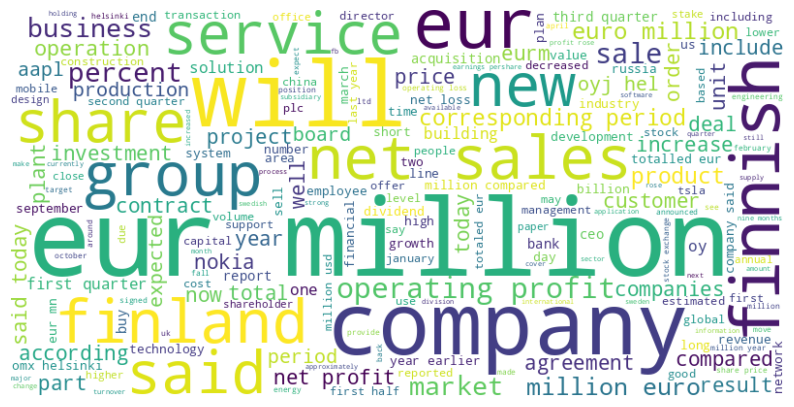

In [11]:
# Juntar todas as frases tokenizadas em uma lista de strings
all_sentences = [' '.join(tokens) for tokens in df['text']]

# Juntar as frases para criar uma string única
all_text = ' '.join(all_sentences)

# Criar um objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=21, max_font_size=110).generate(all_text)

# Exibir a imagem da nuvem de palavras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
# Remover stop_words

def remove_stopwords(text):
    stop_words = ['in','of','at','a','the']
    sem_stop_words = []
    for word in text:
        if word not in stop_words:
          sem_stop_words.append(word)
    return sem_stop_words

df['text'] = df['text'].apply(lambda x: remove_stopwords(x))


In [13]:
# # Stematizar palavras

# def stem_words(text):
#     ps = PorterStemmer()
#     stemmed_words = []
#     for word in text:
#         stemmed_words.append(ps.stem(word))

#     return stemmed_words

# df['text'] = df['text'].apply(lambda x: stem_words(x))

In [14]:
# Lematizar palavras

def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    for word in text:
        lemmatized_words.append(lemmatizer.lemmatize(word.lower()))
    return " ".join(lemmatized_words)

df['text'] = df['text'].apply(lambda x: lemmatize_words(x))

## Salvando o arquivo

In [15]:
df.to_csv(f"../{cfg.data.processed}", index=False)